In [11]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import circuit_drawer
from qiskit import transpile
from qiskit.quantum_info import Operator

from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector


from qiskit import QuantumCircuit, transpile
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import partial_trace

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mord import LogisticIT
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Encode categorical variables
le_performance = LabelEncoder()
df['Algorithm Performance'] = le_performance.fit_transform(df['Algorithm Performance'])

categorical_features = ['Gate Type', 'Gate Connectivity', 'Optimization Level']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Split data
X = df.drop('Algorithm Performance', axis=1)
y = df['Algorithm Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multi-logit ordinal regression
model = LogisticIT()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizations
# Histogram of Circuit Depth
plt.hist(df['Circuit Depth'], bins=10, edgecolor='k')
plt.title('Histogram of Circuit Depth')
plt.xlabel('Circuit Depth')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Error Rate by Performance Category
df['Performance Category'] = le_performance.inverse_transform(df['Algorithm Performance'])
sns.boxplot(x='Performance Category', y='Error Rate', data=df)
plt.title('Boxplot of Error Rate by Performance Category')
plt.xlabel('Performance Category')
plt.ylabel('Error Rate')
plt.show()

# Correlation Heatmap
numerical_features = ['Circuit Depth', 'Error Rate', 'Noise Level']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()


In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mord import LogisticIT
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Quantum Fisher Information (QFI)
def calculate_qfi(circuit, num_qubits):
    """
    Calculate a heuristic Quantum Fisher Information (QFI).
    QFI is simulated as the sum of squared amplitudes of the statevector.
    """
    backend = AerSimulator()  # AerSimulator for quantum simulation
    transpiled_circuit = transpile(circuit, backend)
    statevector = Statevector.from_instruction(transpiled_circuit)  # Simulate statevector
    
    # Simulated QFI heuristic: normalized sum of squared amplitudes
    qfi = np.sum(np.abs(statevector.data) ** 2) / num_qubits
    return qfi

# Define 10 different gate types
gate_types = ['Hadamard', 'CNOT', 'RX', 'RY', 'RZ', 'S', 'T', 'SX', 'Swap', 'CZ']

# Simulate dataset
n_samples = 1000
data = []

for _ in range(n_samples):
    # Generate random features
    depth = np.random.randint(2, 11)  # Circuit depth
    num_qubits = np.random.choice([2, 3])  # Number of qubits
    gate_type = np.random.choice(gate_types)  # Gate type
    error_rate = np.random.uniform(0, 0.05)  # Error rate
    connectivity = np.random.choice(['Low', 'Medium', 'High'])  # Connectivity
    noise_level = np.random.uniform(0, 1)  # Noise level
    optimization_level = np.random.choice(['None', 'Partial', 'Full'])  # Optimization
    
    # Create a random quantum circuit
    circuit = QuantumCircuit(num_qubits)
    for _ in range(depth):
        qubit = np.random.randint(0, num_qubits)
        if gate_type == 'Hadamard':
            circuit.h(qubit)
        elif gate_type == 'CNOT':
            control = qubit
            target = (control + 1) % num_qubits
            circuit.cx(control, target)
        elif gate_type == 'RX':
            circuit.rx(np.random.uniform(0, 2 * np.pi), qubit)
        elif gate_type == 'RY':
            circuit.ry(np.random.uniform(0, 2 * np.pi), qubit)
        elif gate_type == 'RZ':
            circuit.rz(np.random.uniform(0, 2 * np.pi), qubit)
        elif gate_type == 'S':
            circuit.s(qubit)
        elif gate_type == 'T':
            circuit.t(qubit)
        elif gate_type == 'SX':
            circuit.sx(qubit)
        elif gate_type == 'Swap':
            target = (qubit + 1) % num_qubits
            circuit.swap(qubit, target)
        elif gate_type == 'CZ':
            control = qubit
            target = (control + 1) % num_qubits
            circuit.cz(control, target)
        
    # Measure QFI
    qfi = calculate_qfi(circuit, num_qubits)
    
    # Classify performance based on QFI
    if qfi > 0.7:
        performance = 'High'
    elif qfi > 0.4:
        performance = 'Medium'
    else:
        performance = 'Low'
    
    # Append data point
    data.append({
        'Circuit Depth': depth,
        'Number of Qubits': num_qubits,
        'Gate Type': gate_type,
        'Error Rate': error_rate,
        'Gate Connectivity': connectivity,
        'Noise Level': noise_level,
        'Optimization Level': optimization_level,
        'Algorithm Performance': performance
    })


In [14]:
# Convert to a DataFrame
df = pd.DataFrame(data)

In [15]:
df

,Circuit Depth,Number of Qubits,Gate Type,Error Rate,Gate Connectivity,Noise Level,Optimization Level,Algorithm Performance
0,10,3,CZ,0.019582,High,0.232995,None,Low
1,4,3,CZ,0.028406,Medium,0.396083,Partial,Low
2,8,3,S,0.048783,High,0.503523,None,Low
3,3,2,CZ,0.035543,Low,0.653207,Partial,Medium
4,2,2,CZ,0.005904,Medium,0.408863,Partial,Medium
...,...,...,...,...,...,...,...,...
995,2,2,CNOT,0.003028,Medium,0.589406,Full,Medium
996,3,2,CZ,0.040973,High,0.618606,Full,Medium
997,10,2,Swap,0.032365,High,0.360711,Full,Medium
998,7,2,RX,0.028437,Medium,0.882989,None,Medium


Descriptive Statistics:
         Circuit Depth  Number of Qubits Gate Type   Error Rate  \
count     1000.000000       1000.000000      1000  1000.000000   
unique            NaN               NaN        10          NaN   
top               NaN               NaN         T          NaN   
freq              NaN               NaN       117          NaN   
mean         6.045000          2.498000       NaN     0.024478   
std          2.650283          0.500246       NaN     0.014517   
min          2.000000          2.000000       NaN     0.000068   
25%          4.000000          2.000000       NaN     0.012088   
50%          6.000000          2.000000       NaN     0.023570   
75%          8.000000          3.000000       NaN     0.037400   
max         10.000000          3.000000       NaN     0.049819   

       Gate Connectivity  Noise Level Optimization Level Algorithm Performance  
count               1000  1000.000000               1000                  1000  
unique              

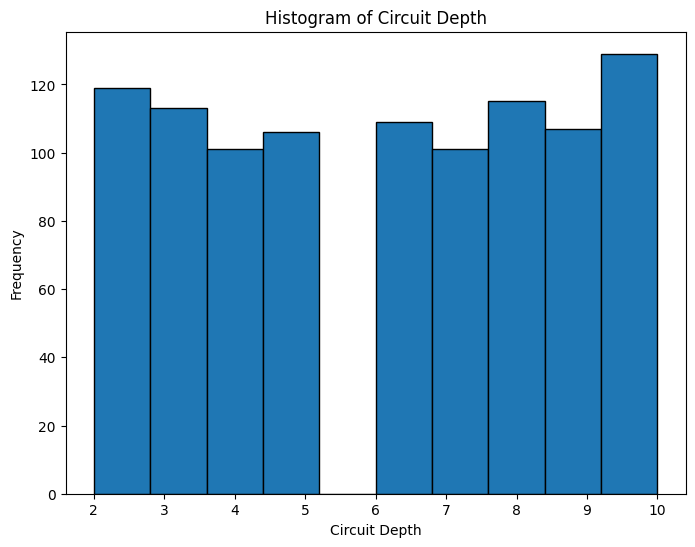

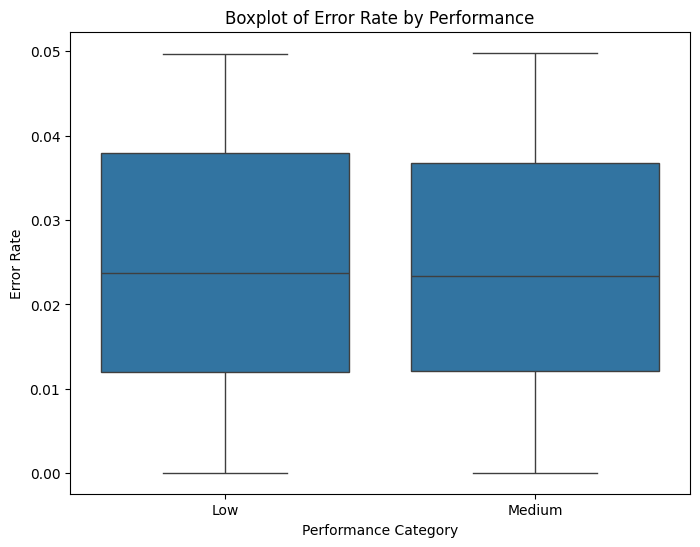

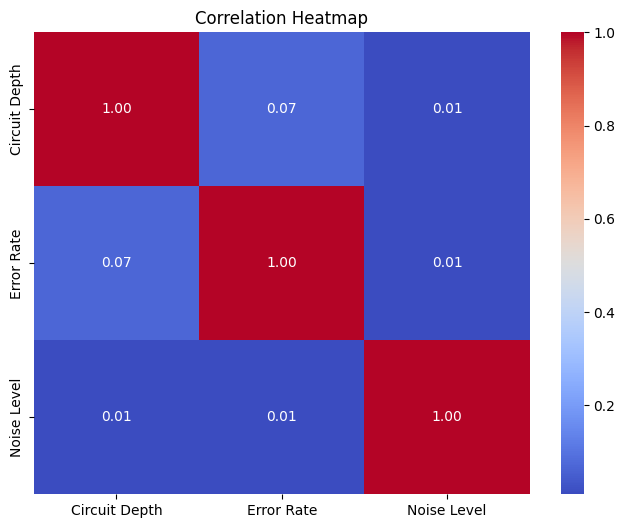

In [16]:
# Descriptive Statistics
print("Descriptive Statistics:\n", df.describe(include='all'))

# Visualizations
# Histogram for Circuit Depth
plt.figure(figsize=(8, 6))
plt.hist(df['Circuit Depth'], bins=10, edgecolor='k')
plt.title('Histogram of Circuit Depth')
plt.xlabel('Circuit Depth')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Error Rate by Performance Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Algorithm Performance', y='Error Rate', data=df)
plt.title('Boxplot of Error Rate by Performance')
plt.xlabel('Performance Category')
plt.ylabel('Error Rate')
plt.show()

# Correlation Heatmap
numerical_features = ['Circuit Depth', 'Error Rate', 'Noise Level']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Confusion Matrix:
[[101   0]
 [  0  99]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



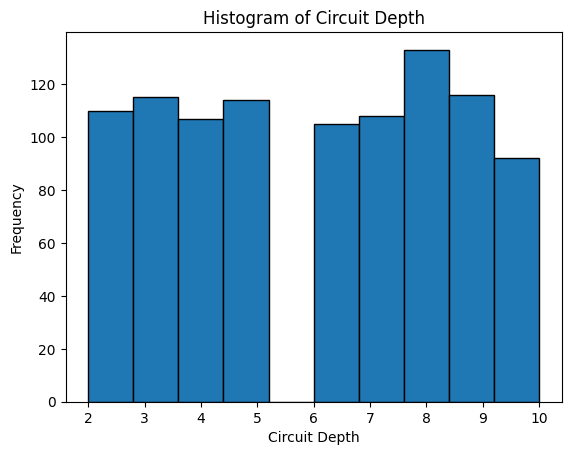

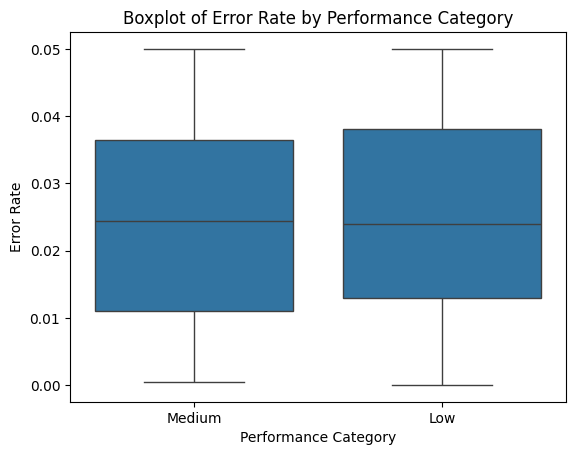

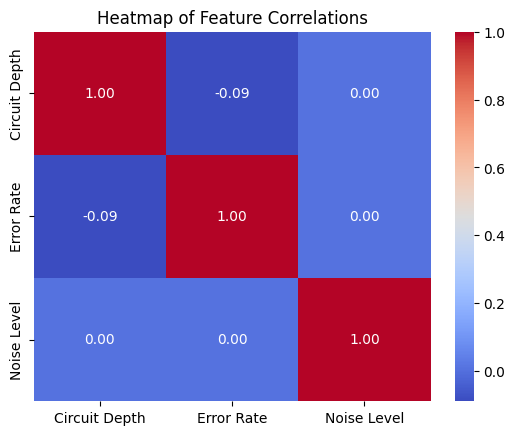

In [9]:
# Encode categorical variables
le_performance = LabelEncoder()
df['Algorithm Performance'] = le_performance.fit_transform(df['Algorithm Performance'])

categorical_features = ['Gate Type', 'Gate Connectivity', 'Optimization Level']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Split data
X = df.drop('Algorithm Performance', axis=1)
y = df['Algorithm Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multi-logit ordinal regression
model = LogisticIT()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizations
# Histogram of Circuit Depth
plt.hist(df['Circuit Depth'], bins=10, edgecolor='k')
plt.title('Histogram of Circuit Depth')
plt.xlabel('Circuit Depth')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Error Rate by Performance Category
df['Performance Category'] = le_performance.inverse_transform(df['Algorithm Performance'])
sns.boxplot(x='Performance Category', y='Error Rate', data=df)
plt.title('Boxplot of Error Rate by Performance Category')
plt.xlabel('Performance Category')
plt.ylabel('Error Rate')
plt.show()

# Correlation Heatmap
numerical_features = ['Circuit Depth', 'Error Rate', 'Noise Level']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [17]:
# Chi-Square Test
print("\nChi-Square Test for Gate Type and Algorithm Performance:")
contingency_table = pd.crosstab(df['Gate Type'], df['Algorithm Performance'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")



Chi-Square Test for Gate Type and Algorithm Performance:
Chi-Square Statistic: 6.855178974244351, p-value: 0.6521943363293266


In [22]:
# ANOVA Test
if 'Execution Time' in df.columns:
    print("\nANOVA Test for Execution Time across Performance Categories:")
    grouped_data = [df[df['Algorithm Performance'] == cat]['Execution Time'] for cat in df['Algorithm Performance'].unique()]
    f_stat, p_val = f_oneway(*grouped_data)
    print(f"F-Statistic: {f_stat}, p-value: {p_val}")


NameError: name 'f_stat' is not defined

In [23]:
# Shapiro-Wilk Test for normality
for category in df['Algorithm Performance'].unique():
    stat, p = shapiro(df[df['Algorithm Performance'] == category]['Execution Time'])
    print(f"Shapiro-Wilk test for {category}: p-value = {p}")


NameError: name 'shapiro' is not defined

In [24]:
from scipy.stats import bartlett
print("\nBartlett’s Test for Homogeneity of Variance:")
grouped_data = [df[df['Algorithm Performance'] == cat]['Execution Time'] for cat in df['Algorithm Performance'].unique()]
stat, p = bartlett(*grouped_data)
print(f"Bartlett’s Statistic: {stat}, p-value: {p}")



Bartlett’s Test for Homogeneity of Variance:


KeyError: 'Execution Time'


Descriptive Statistics:
        Circuit Depth  Number of Qubits   Error Rate  Noise Level  \
count     1000.000000       1000.000000  1000.000000  1000.000000   
unique            NaN               NaN          NaN          NaN   
top               NaN               NaN          NaN          NaN   
freq              NaN               NaN          NaN          NaN   
mean         5.977000          2.508000     0.024709     0.496412   
std          2.549308          0.500186     0.014582     0.287139   
min          2.000000          2.000000     0.000070     0.000227   
25%          4.000000          2.000000     0.012173     0.236507   
50%          6.000000          3.000000     0.024261     0.496363   
75%          8.000000          3.000000     0.037504     0.737664   
max         10.000000          3.000000     0.049992     0.997997   

        Algorithm Performance Gate Type_CZ Gate Type_Hadamard Gate Type_RX  \
count             1000.000000         1000               1000       

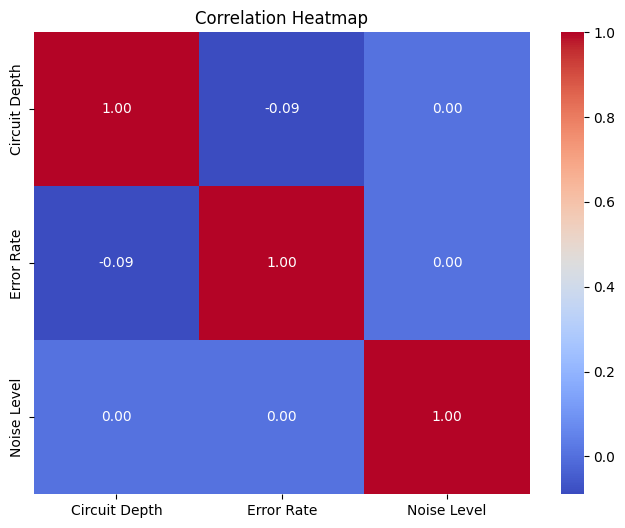

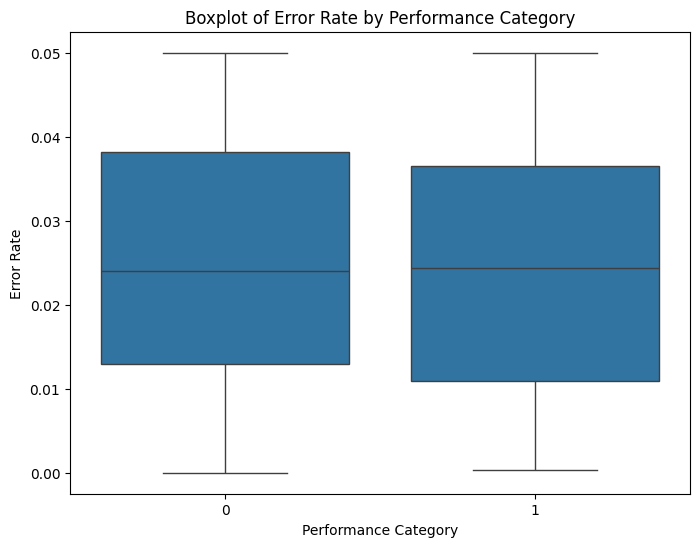

KeyError: "None of [Index(['Gate Type', 'Gate Connectivity', 'Optimization Level'], dtype='object')] are in the [columns]"

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import chi2_contingency, f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `df` is the DataFrame created in the previous simulation step
# If not, you can run the simulation code to generate it.

# Label Encoding for categorical response variable
le_performance = LabelEncoder()
df['Algorithm Performance'] = le_performance.fit_transform(df['Algorithm Performance'])

# Exploratory Data Analysis (EDA)
## Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

## Correlation Analysis
numerical_features = ['Circuit Depth', 'Error Rate', 'Noise Level']
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Error Rate by Performance
df['Performance Category'] = le_performance.inverse_transform(df['Algorithm Performance'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='Performance Category', y='Error Rate', data=df)
plt.title('Boxplot of Error Rate by Performance Category')
plt.xlabel('Performance Category')
plt.ylabel('Error Rate')
plt.show()

# Logistic Regression Model
categorical_features = ['Gate Type', 'Gate Connectivity', 'Optimization Level']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded.drop(['Algorithm Performance', 'Performance Category'], axis=1)
y = df_encoded['Algorithm Performance']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Hypothesis Testing
## Chi-Square Test for Gate Type and Performance Category
print("\nChi-Square Test for Gate Type and Performance Category:")
contingency_table = pd.crosstab(df['Gate Type'], df['Performance Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

## ANOVA Test for Execution Time across Performance Categories
if 'Execution Time' in df.columns:  # Ensure column exists in dataset
    print("\nANOVA Test for Execution Time across Performance Categories:")
    grouped_data = [df[df['Performance Category'] == cat]['Execution Time'] for cat in df['Performance Category'].unique()]
    f_stat, p_val = f_oneway(*grouped_data)
    print(f"F-Statistic: {f_stat}, p-value: {p_val}")

# Visualizations
# Histogram of Circuit Depth
plt.figure(figsize=(8, 6))
plt.hist(df['Circuit Depth'], bins=10, edgecolor='k')
plt.title('Histogram of Circuit Depth')
plt.xlabel('Circuit Depth')
plt.ylabel('Frequency')
plt.show()

# Frequency Bar Plot for Categorical Features
categorical_columns = ['Gate Type', 'Gate Connectivity', 'Optimization Level']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Descriptive Statistics:
         Circuit Depth  Number of Qubits Gate Type   Error Rate  \
count     1000.000000       1000.000000      1000  1000.000000   
unique            NaN               NaN        10          NaN   
top               NaN               NaN         S          NaN   
freq              NaN               NaN       116          NaN   
mean         5.974000          2.493000       NaN     0.025016   
std          2.582633          0.500201       NaN     0.014045   
min          2.000000          2.000000       NaN     0.000115   
25%          4.000000          2.000000       NaN     0.013032   
50%          6.000000          2.000000       NaN     0.024892   
75%          8.000000          3.000000       NaN     0.036613   
max         10.000000          3.000000       NaN     0.049986   

       Gate Connectivity  Noise Level Optimization Level  \
count               1000  1000.000000               1000   
unique                 3          NaN                  3   
to

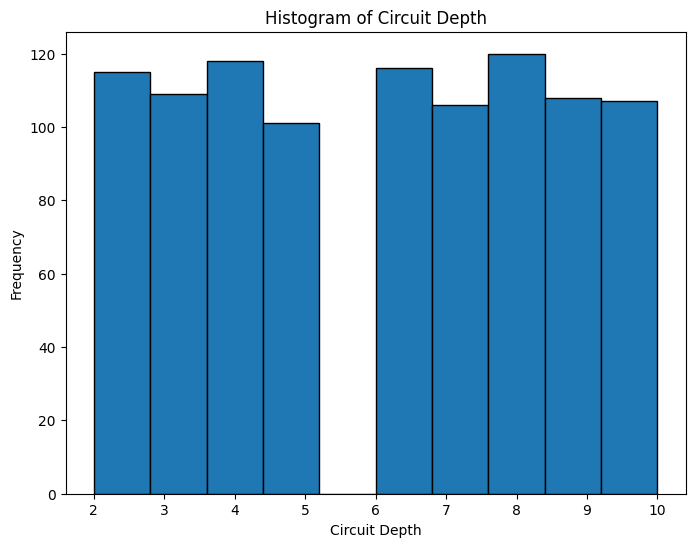

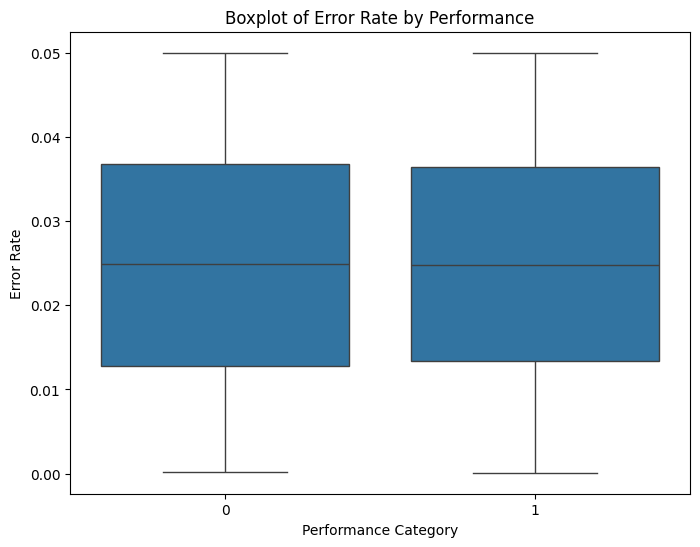

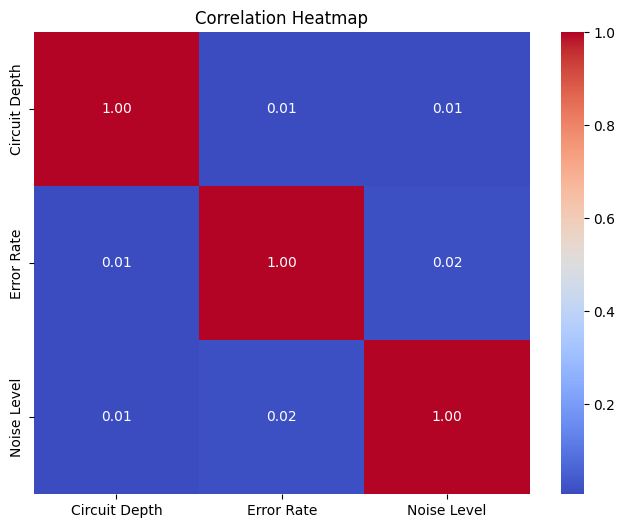


Chi-Square Test for Gate Type and Performance:
Chi-Square Statistic: 3.8116131160987603, p-value: 0.9233682899757092

ANOVA Test for Execution Time across Performance Categories:
Shapiro-Wilk test for Error Rate in 1: p-value = 6.126795623344294e-10
Shapiro-Wilk test for Error Rate in 0: p-value = 1.508962409992468e-10

Bartlett’s Test: Statistic = 0.028384430391203103, p-value = 0.8662081977795703

Confusion Matrix:
[[105   0]
 [  0  95]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        95

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



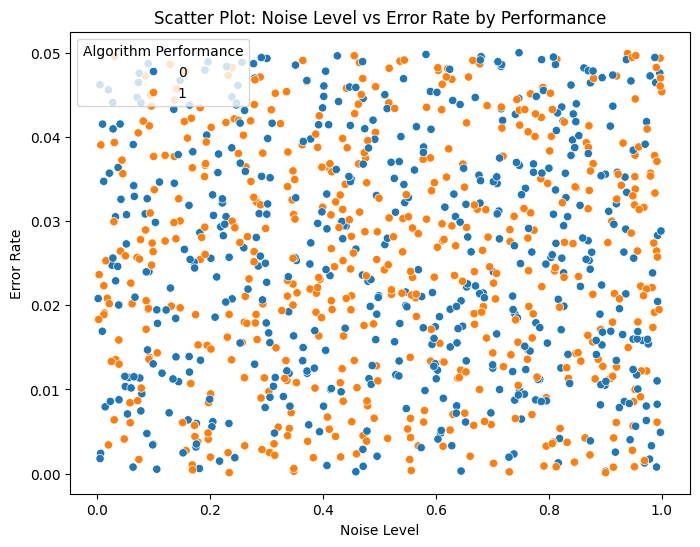

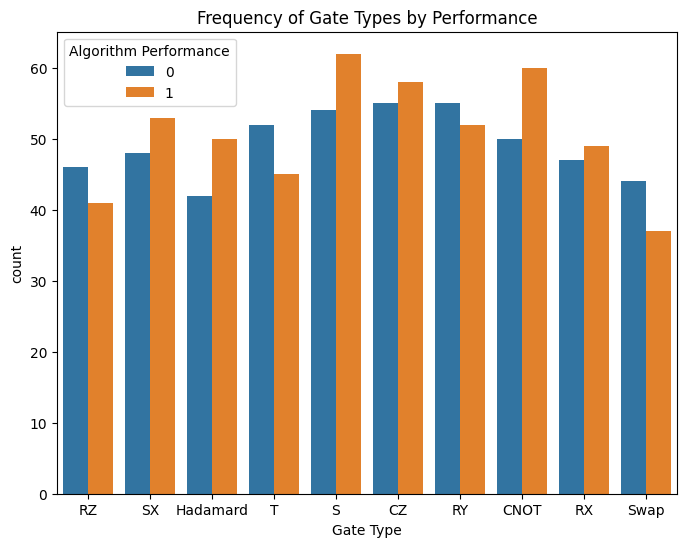

In [25]:
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mord import LogisticIT
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import chi2_contingency, f_oneway, shapiro, bartlett
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate Quantum Fisher Information (QFI)
def calculate_qfi(circuit, num_qubits):
    backend = AerSimulator()
    transpiled_circuit = transpile(circuit, backend)
    statevector = Statevector.from_instruction(transpiled_circuit)
    qfi = np.sum(np.abs(statevector.data) ** 2) / num_qubits
    return qfi

# Generate synthetic dataset with 10 gate types
gate_types = ['Hadamard', 'CNOT', 'RX', 'RY', 'RZ', 'S', 'T', 'SX', 'Swap', 'CZ']
n_samples = 1000
data = []

for _ in range(n_samples):
    depth = np.random.randint(2, 11)
    num_qubits = np.random.choice([2, 3])
    gate_type = np.random.choice(gate_types)
    error_rate = np.random.uniform(0, 0.05)
    connectivity = np.random.choice(['Low', 'Medium', 'High'])
    noise_level = np.random.uniform(0, 1)
    optimization_level = np.random.choice(['None', 'Partial', 'Full'])
    
    circuit = QuantumCircuit(num_qubits)
    for _ in range(depth):
        qubit = np.random.randint(0, num_qubits)
        if gate_type == 'Hadamard':
            circuit.h(qubit)
        elif gate_type == 'CNOT':
            control = qubit
            target = (control + 1) % num_qubits
            circuit.cx(control, target)
        elif gate_type == 'RX':
            circuit.rx(np.random.uniform(0, 2 * np.pi), qubit)
        elif gate_type == 'RY':
            circuit.ry(np.random.uniform(0, 2 * np.pi), qubit)
        elif gate_type == 'RZ':
            circuit.rz(np.random.uniform(0, 2 * np.pi), qubit)
        elif gate_type == 'S':
            circuit.s(qubit)
        elif gate_type == 'T':
            circuit.t(qubit)
        elif gate_type == 'SX':
            circuit.sx(qubit)
        elif gate_type == 'Swap':
            target = (qubit + 1) % num_qubits
            circuit.swap(qubit, target)
        elif gate_type == 'CZ':
            control = qubit
            target = (control + 1) % num_qubits
            circuit.cz(control, target)
    
    qfi = calculate_qfi(circuit, num_qubits)
    if qfi > 0.7:
        performance = 'High'
    elif qfi > 0.4:
        performance = 'Medium'
    else:
        performance = 'Low'
    
    data.append({
        'Circuit Depth': depth,
        'Number of Qubits': num_qubits,
        'Gate Type': gate_type,
        'Error Rate': error_rate,
        'Gate Connectivity': connectivity,
        'Noise Level': noise_level,
        'Optimization Level': optimization_level,
        'Algorithm Performance': performance
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
le_performance = LabelEncoder()
df['Algorithm Performance'] = le_performance.fit_transform(df['Algorithm Performance'])

categorical_features = ['Gate Type', 'Gate Connectivity', 'Optimization Level']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Exploratory Data Analysis (EDA)
print("Descriptive Statistics:\n", df.describe(include='all'))

# Visualizations
plt.figure(figsize=(8, 6))
plt.hist(df['Circuit Depth'], bins=10, edgecolor='k')
plt.title('Histogram of Circuit Depth')
plt.xlabel('Circuit Depth')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Algorithm Performance', y='Error Rate', data=df)
plt.title('Boxplot of Error Rate by Performance')
plt.xlabel('Performance Category')
plt.ylabel('Error Rate')
plt.show()

numerical_features = ['Circuit Depth', 'Error Rate', 'Noise Level']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Statistical Analysis
# Chi-Square Test
print("\nChi-Square Test for Gate Type and Performance:")
contingency_table = pd.crosstab(df['Gate Type'], df['Algorithm Performance'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

# ANOVA
print("\nANOVA Test for Execution Time across Performance Categories:")
if 'Execution Time' in df.columns:
    grouped_data = [df[df['Algorithm Performance'] == cat]['Execution Time'] for cat in df['Algorithm Performance'].unique()]
    f_stat, p_val = f_oneway(*grouped_data)
    print(f"F-Statistic: {f_stat}, p-value: {p_val}")

# Shapiro-Wilk Test for normality
for category in df['Algorithm Performance'].unique():
    stat, p = shapiro(df[df['Algorithm Performance'] == category]['Error Rate'])
    print(f"Shapiro-Wilk test for Error Rate in {category}: p-value = {p}")

# Bartlett's Test
grouped_data = [df[df['Algorithm Performance'] == cat]['Error Rate'] for cat in df['Algorithm Performance'].unique()]
stat, p = bartlett(*grouped_data)
print(f"\nBartlett’s Test: Statistic = {stat}, p-value = {p}")

# Logistic Regression
X = df_encoded.drop(['Algorithm Performance'], axis=1)
y = df_encoded['Algorithm Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticIT()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Scatter Plot for Noise Level vs Error Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Noise Level', y='Error Rate', hue='Algorithm Performance')
plt.title('Scatter Plot: Noise Level vs Error Rate by Performance')
plt.show()

# Bar Plot for Gate Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gate Type', hue='Algorithm Performance')
plt.title('Frequency of Gate Types by Performance')
plt.show()


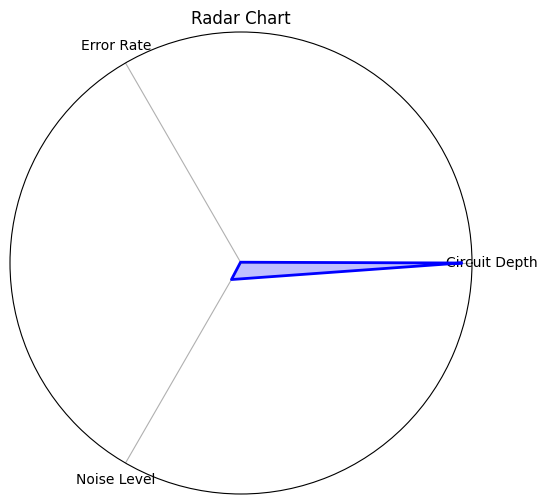

In [26]:
from math import pi

categories = ['Circuit Depth', 'Error Rate', 'Noise Level']
values = df[categories].mean().values

# Radar chart setup
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart')
plt.show()


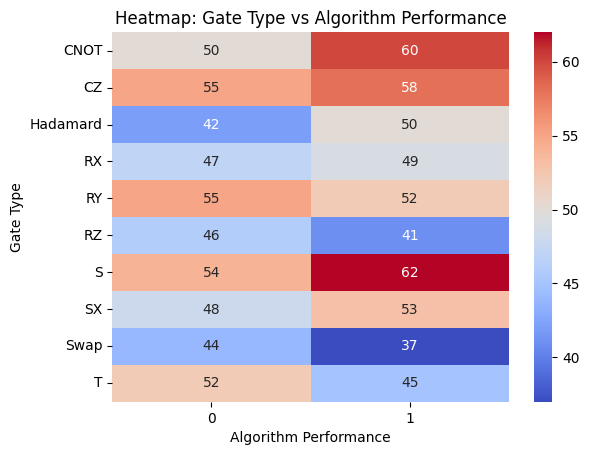

In [27]:
heatmap_data = pd.crosstab(df['Gate Type'], df['Algorithm Performance'])
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap: Gate Type vs Algorithm Performance')
plt.show()


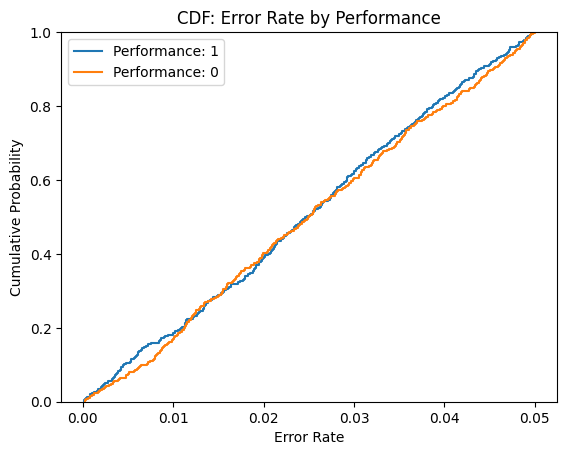

In [28]:
for performance in df['Algorithm Performance'].unique():
    subset = df[df['Algorithm Performance'] == performance]['Error Rate']
    sns.ecdfplot(subset, label=f'Performance: {performance}')

plt.legend()
plt.title('CDF: Error Rate by Performance')
plt.xlabel('Error Rate')
plt.ylabel('Cumulative Probability')
plt.show()


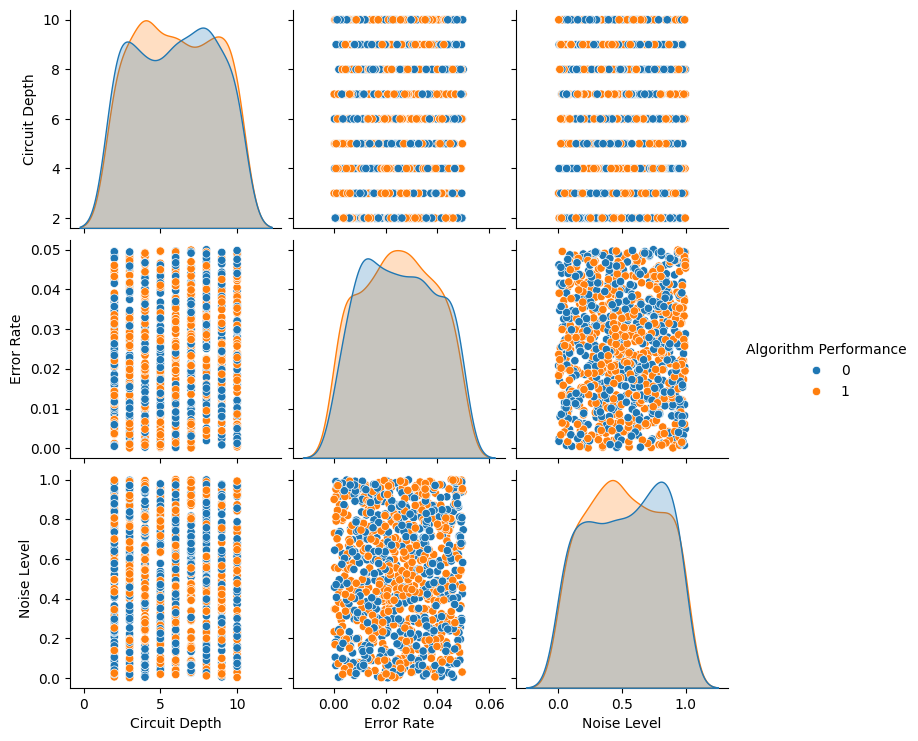

In [29]:
sns.pairplot(df, hue='Algorithm Performance', vars=['Circuit Depth', 'Error Rate', 'Noise Level'])
plt.show()


In [30]:
from scipy.stats import fisher_exact

table = pd.crosstab(df['Gate Type'], df['Algorithm Performance'])
if table.shape[0] == 2 and table.shape[1] == 2:
    stat, p = fisher_exact(table)
    print(f"Fisher’s Exact Test: Statistic={stat}, p-value={p}")


In [35]:
# Import required libraries
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit, transpile

from qiskit.quantum_info import Statevector
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import circuit_drawer
from qiskit import transpile
from qiskit.quantum_info import Operator

from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector


from qiskit import QuantumCircuit, transpile
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import partial_trace
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mord import LogisticIT
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import chi2_contingency, f_oneway, shapiro, bartlett
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize variables
num_samples = 1000  # Number of circuits
gate_types = ['h', 'x', 'y', 'cx', 'z']  # Gate types
data = []



# Define a function to calculate Quantum Fisher Information (QFI)
def calculate_qfi(circuit, num_qubits):
    """
    Calculate a heuristic Quantum Fisher Information (QFI).
    QFI is simulated as the sum of squared amplitudes of the statevector.
    """
    backend = AerSimulator()  # AerSimulator for quantum simulation
    transpiled_circuit = transpile(circuit, backend)
    statevector = Statevector.from_instruction(transpiled_circuit)  # Simulate statevector
    
    # Simulated QFI heuristic: normalized sum of squared amplitudes
    qfi = np.sum(np.abs(statevector.data) ** 2) / num_qubits
    return qfi

# Define noise model
def create_noise_model(error_rate, num_qubits):
    noise_model = NoiseModel()
    # Add single-qubit Pauli-X errors
    error = pauli_error([('X', error_rate), ('I', 1 - error_rate)])
    for i in range(num_qubits):
        noise_model.add_all_qubit_quantum_error(error, ['x', 'h', 'y', 'z'])
    return noise_model

# Create 1000 circuits
for _ in range(num_samples):
    depth = np.random.randint(2, 11)  # Circuit depth
    num_qubits = np.random.choice([2, 3])  # Number of qubits
    noise_level = np.random.uniform(0, 1)  # Noise level
    error_rate = np.random.uniform(0, 0.05)  # Gate error rate
    optimization_level = np.random.choice(['None', 'Partial', 'Full'])  # Optimization level
    
    # Create Quantum Circuit
    qc = QuantumCircuit(num_qubits)
    for _ in range(depth):
        gate = np.random.choice(gate_types)
        if gate == 'cx':  # For two-qubit gate
            if num_qubits > 1:
                qc.cx(0, 1)
        else:
            qubit = np.random.randint(0, num_qubits)
            getattr(qc, gate)(qubit)

    # Compute QFI
    qfi = calculate_qfi(qc, num_qubits)

    # Determine performance category
    if qfi >= 8:
        performance = 'High'
    elif qfi >= 5:
        performance = 'Medium'
    else:
        performance = 'Low'
    
    # Connectivity metric (simplified placeholder: high if CX gate exists)
    connectivity = 'High' if 'cx' in qc.count_ops() else 'Low'
    
    # Append data
    data.append([depth, num_qubits, gate, noise_level, error_rate, connectivity, optimization_level, qfi, performance])

# Convert to DataFrame
columns = ['Circuit Depth', 'Number of Qubits', 'Gate Type', 'Noise Level', 
           'Error Rate', 'Connectivity', 'Optimization Level', 'QFI', 'Algorithm Performance']
dataset = pd.DataFrame(data, columns=columns)

# Map categorical variables
dataset['Algorithm Performance'] = dataset['Algorithm Performance'].map({'Low': 1, 'Medium': 2, 'High': 3})
dataset['Connectivity'] = dataset['Connectivity'].map({'Low': 0, 'High': 1})
dataset['Optimization Level'] = dataset['Optimization Level'].map({'None': 0, 'Partial': 1, 'Full': 2})

# Save or Display Dataset
print(dataset.head())


   Circuit Depth  Number of Qubits Gate Type  Noise Level  Error Rate  \
0              9                 3         x     0.826388    0.002280   
1              2                 2         h     0.830504    0.021311   
2             10                 3        cx     0.330043    0.037181   
3              8                 3        cx     0.663269    0.013764   
4              9                 3         z     0.272264    0.025497   

   Connectivity  Optimization Level       QFI  Algorithm Performance  
0             1                   2  0.333333                      1  
1             1                   1  0.500000                      1  
2             1                   1  0.333333                      1  
3             1                   1  0.333333                      1  
4             1                   0  0.333333                      1  


In [36]:
dataset.head()

,Circuit Depth,Number of Qubits,Gate Type,Noise Level,Error Rate,Connectivity,Optimization Level,QFI,Algorithm Performance
0,9,3,x,0.826388,0.002280,1,2,0.333333,1
1,2,2,h,0.830504,0.021311,1,1,0.500000,1
2,10,3,cx,0.330043,0.037181,1,1,0.333333,1
3,8,3,cx,0.663269,0.013764,1,1,0.333333,1
4,9,3,z,0.272264,0.025497,1,0,0.333333,1


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

# Encoding categorical variables
dataset['Algorithm Performance'] = pd.Categorical(dataset['Algorithm Performance'], categories=[1, 2, 3], ordered=True)
dataset['Connectivity'] = dataset['Connectivity'].astype('category')
dataset['Optimization Level'] = dataset['Optimization Level'].astype('category')

# Normalizing numerical features
scaler = StandardScaler()
numerical_features = ['Circuit Depth', 'Number of Qubits', 'Noise Level', 'Error Rate', 'QFI']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

print("Data Preparation Done.")


Data Preparation Done.


In [41]:
# Descriptive statistics
dataset.describe()



,Circuit Depth,Number of Qubits,Noise Level,Error Rate,QFI
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.771561e-17,-1.563194e-16,-1.296740e-16,-1.065814e-16,-5.186962e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.545770e+00,-1.006018e+00,-1.751905e+00,-1.783380e+00,-9.940179e-01
25%,-7.738501e-01,-1.006018e+00,-8.500715e-01,-8.406974e-01,-9.940179e-01
50%,-1.929801e-03,9.940179e-01,-2.536048e-02,-2.145191e-02,-9.940179e-01
75%,7.699905e-01,9.940179e-01,9.028779e-01,8.456577e-01,1.006018e+00
max,1.541911e+00,9.940179e-01,1.694878e+00,1.748976e+00,1.006018e+00


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Circuit Depth          1000 non-null   float64 
 1   Number of Qubits       1000 non-null   float64 
 2   Gate Type              1000 non-null   object  
 3   Noise Level            1000 non-null   float64 
 4   Error Rate             1000 non-null   float64 
 5   Connectivity           1000 non-null   category
 6   Optimization Level     1000 non-null   category
 7   QFI                    1000 non-null   float64 
 8   Algorithm Performance  1000 non-null   category
dtypes: category(3), float64(5), object(1)
memory usage: 50.3+ KB


Circuit Depth             float64
Number of Qubits          float64
Gate Type                  object
Noise Level               float64
Error Rate                float64
Connectivity             category
Optimization Level       category
QFI                       float64
Algorithm Performance    category
dtype: object


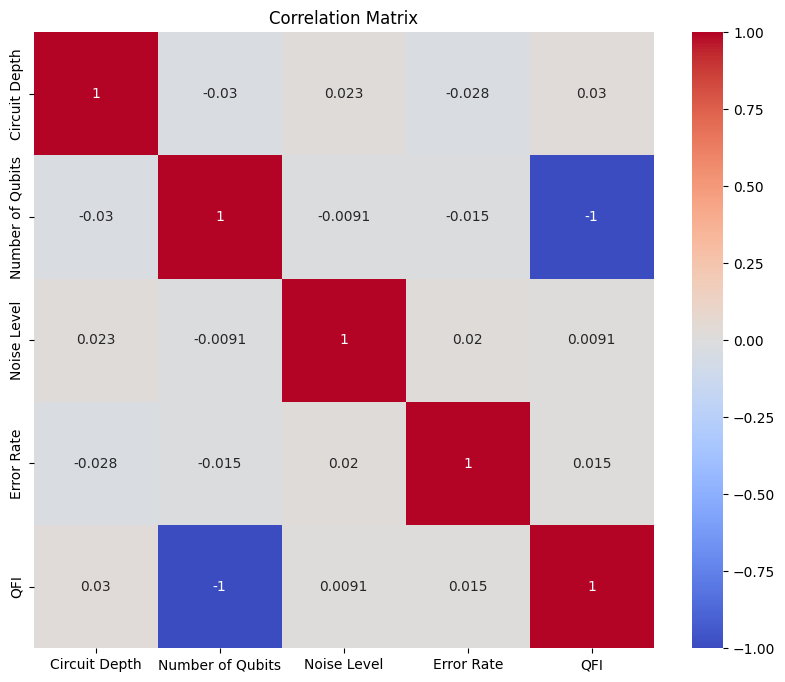

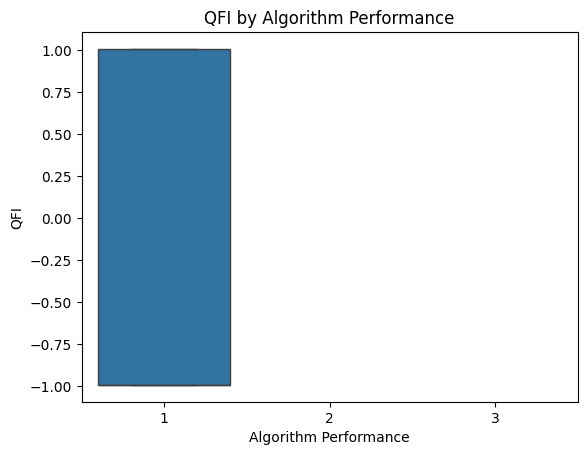

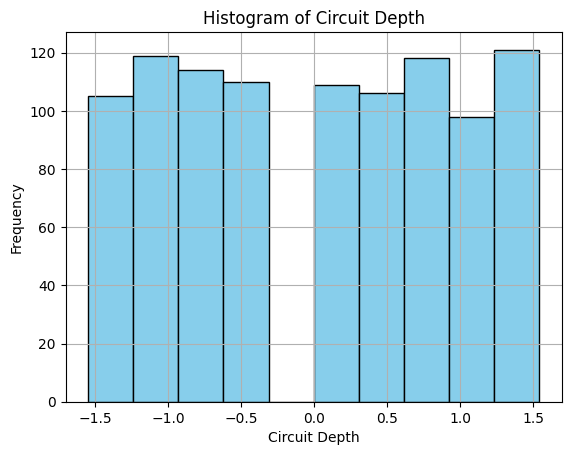

In [45]:

# Correlation heatmap
# Check data types
print(dataset.dtypes)

# Select only numeric columns for correlation
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dataset[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Boxplot for QFI by Algorithm Performance
sns.boxplot(x='Algorithm Performance', y='QFI', data=dataset)
plt.title("QFI by Algorithm Performance")
plt.show()

# Histogram for Circuit Depth
dataset['Circuit Depth'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Circuit Depth")
plt.xlabel("Circuit Depth")
plt.ylabel("Frequency")
plt.show()


In [46]:
print(dataset['QFI'].describe())
print(dataset['QFI'].value_counts())


count    1.000000e+03
mean    -5.186962e-16
std      1.000500e+00
min     -9.940179e-01
25%     -9.940179e-01
50%     -9.940179e-01
75%      1.006018e+00
max      1.006018e+00
Name: QFI, dtype: float64
QFI
 1.006018    209
-0.994018    201
 1.006018    193
-0.994018    186
-0.994018    113
 1.006018     94
-0.994018      3
 1.006018      1
Name: count, dtype: int64
